# 전처리
- 문제설정 > 데이터 수집 > 데이터 처리 > 데이터 분석 > 결론도출

In [ ]:
[1, 3, 5, 1] [w0] [0]
[1, 4, 9, 8]*[w1]=[1]
[1, 1, 0, 1] [w2] [0]

In [1]:
%ls datas

article.csv        preprocessing.csv  seoul.csv


In [3]:
df = pd.read_csv("datas/preprocessing.csv")
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,A
6,7.0,0.7,7.0,NaN,A


## 1. 결측 데이터
- missingno
- `$ pip install missingno`

In [4]:
import missingno as msno

In [6]:
# df.isna()
df.isnull().sum()

x1    2
x2    3
x3    2
x4    1
x5    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5 non-null      float64
 1   x2      4 non-null      float64
 2   x3      5 non-null      float64
 3   x4      6 non-null      object 
 4   x5      7 non-null      object 
dtypes: float64(3), object(2)
memory usage: 408.0+ bytes


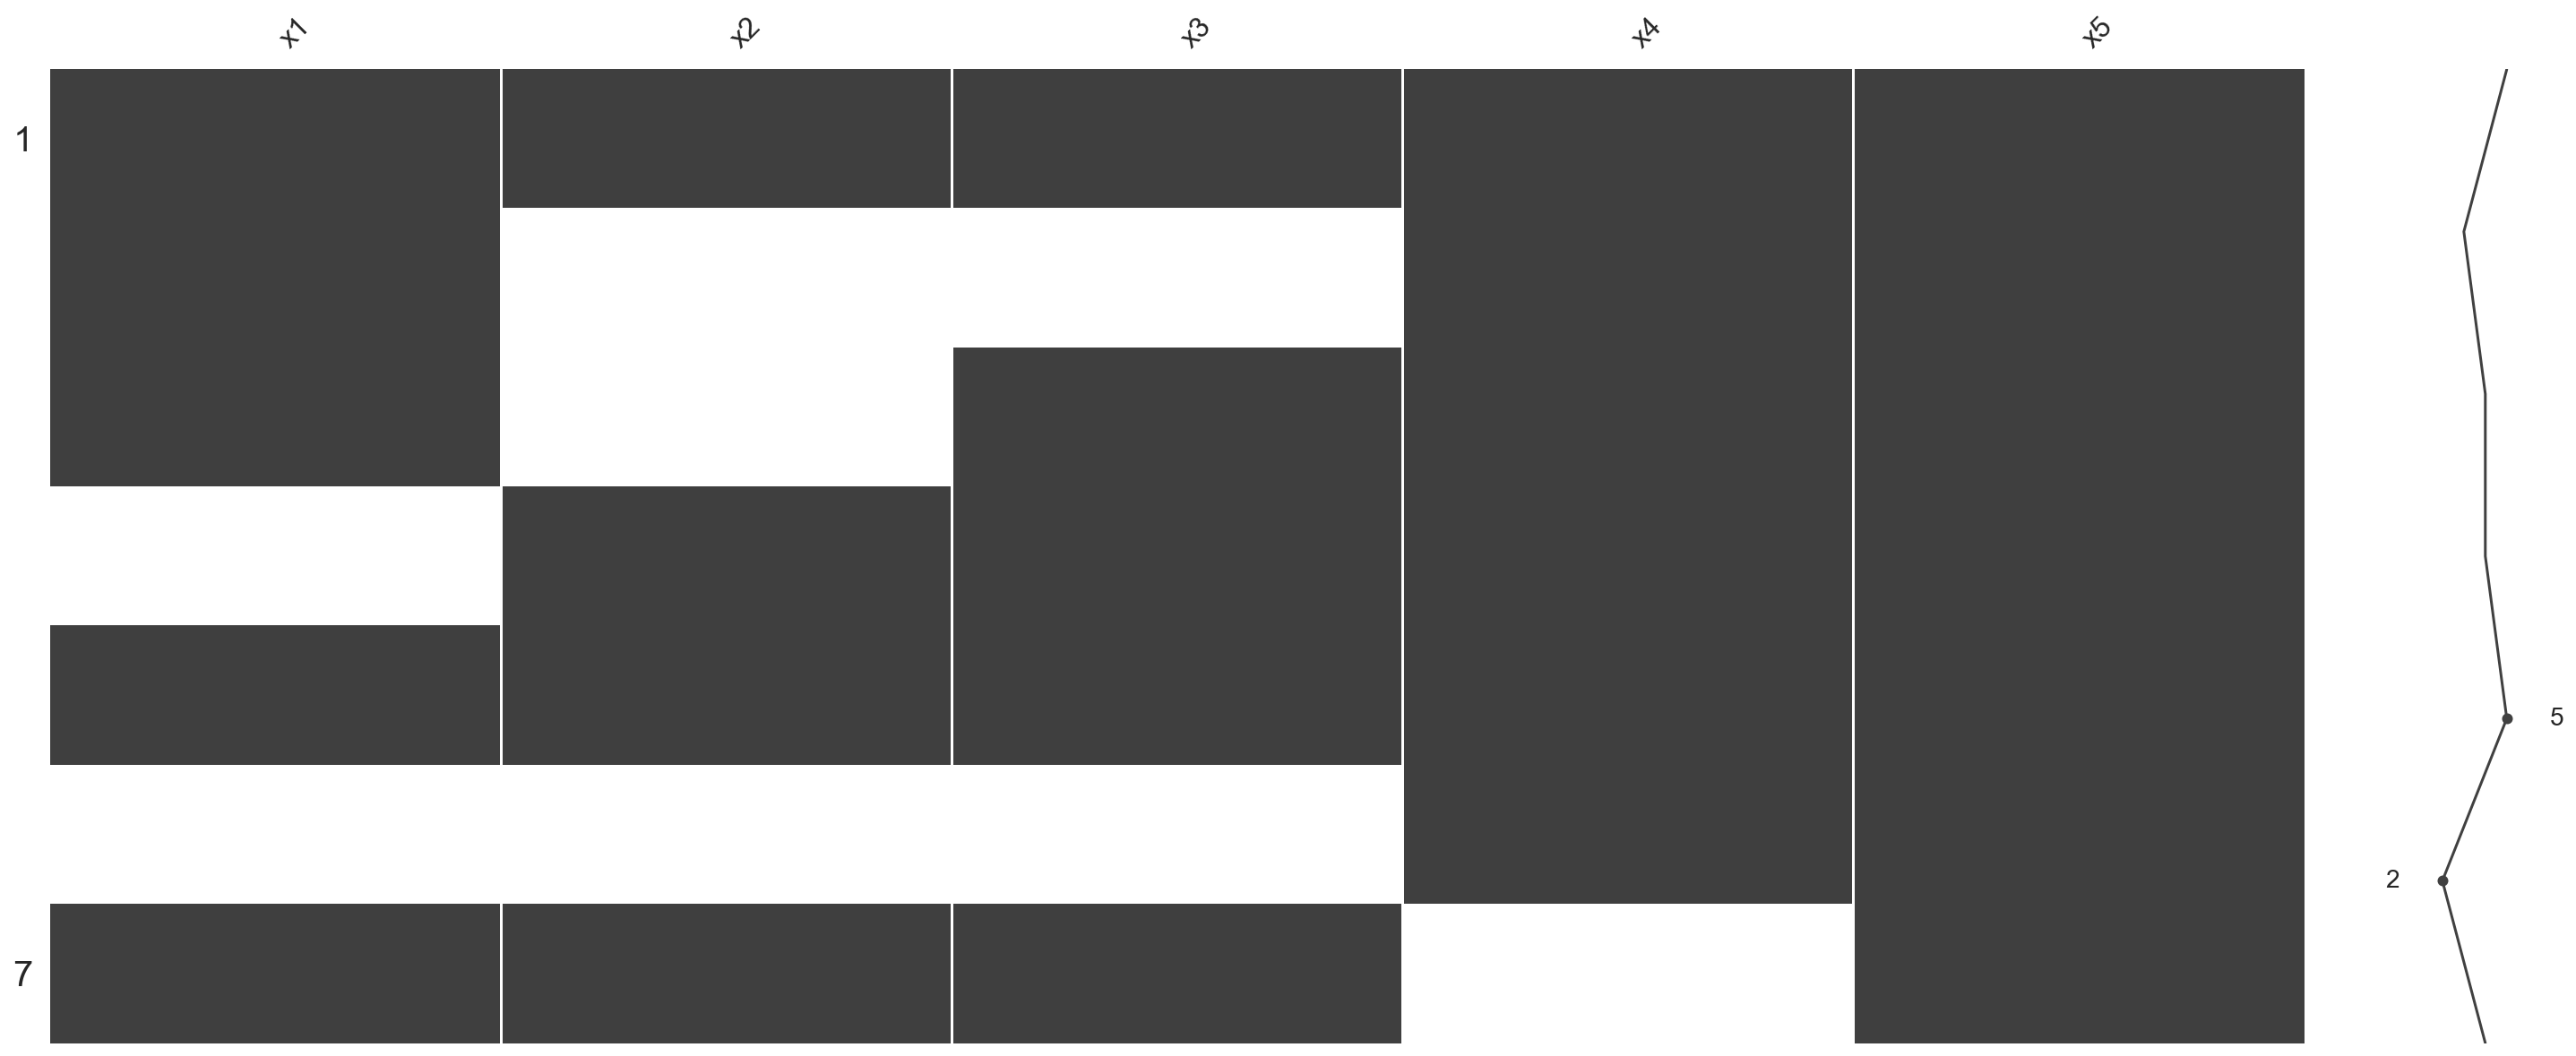

In [8]:
msno.matrix(df)

## 결측치 데이터 처리

### 1. nan가 있는 row나 column을 제거

In [9]:
df.dropna() # row 삭제

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
4,5.0,0.5,5.0,2019-01-05,B


In [10]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,A
6,A


### 2. 데이터가 많이 비어있는 컬럼을 삭제

In [11]:
# row 데이터가 5개 이상인 데이터만 남김
df.dropna(thresh=5, axis=1)

,x1,x3,x4,x5
0,1.0,1.0,2019-01-01,A
1,2.0,NaN,2019-01-02,B
2,3.0,3.0,2019-01-03,C
3,NaN,4.0,2019-01-04,A
4,5.0,5.0,2019-01-05,B
5,NaN,NaN,2019-01-06,A
6,7.0,7.0,NaN,A


### 결측 데이터 탐색 및 제거 : titanic

In [12]:
titanic_df = sns.load_dataset("titanic")
titanic_df.tail(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


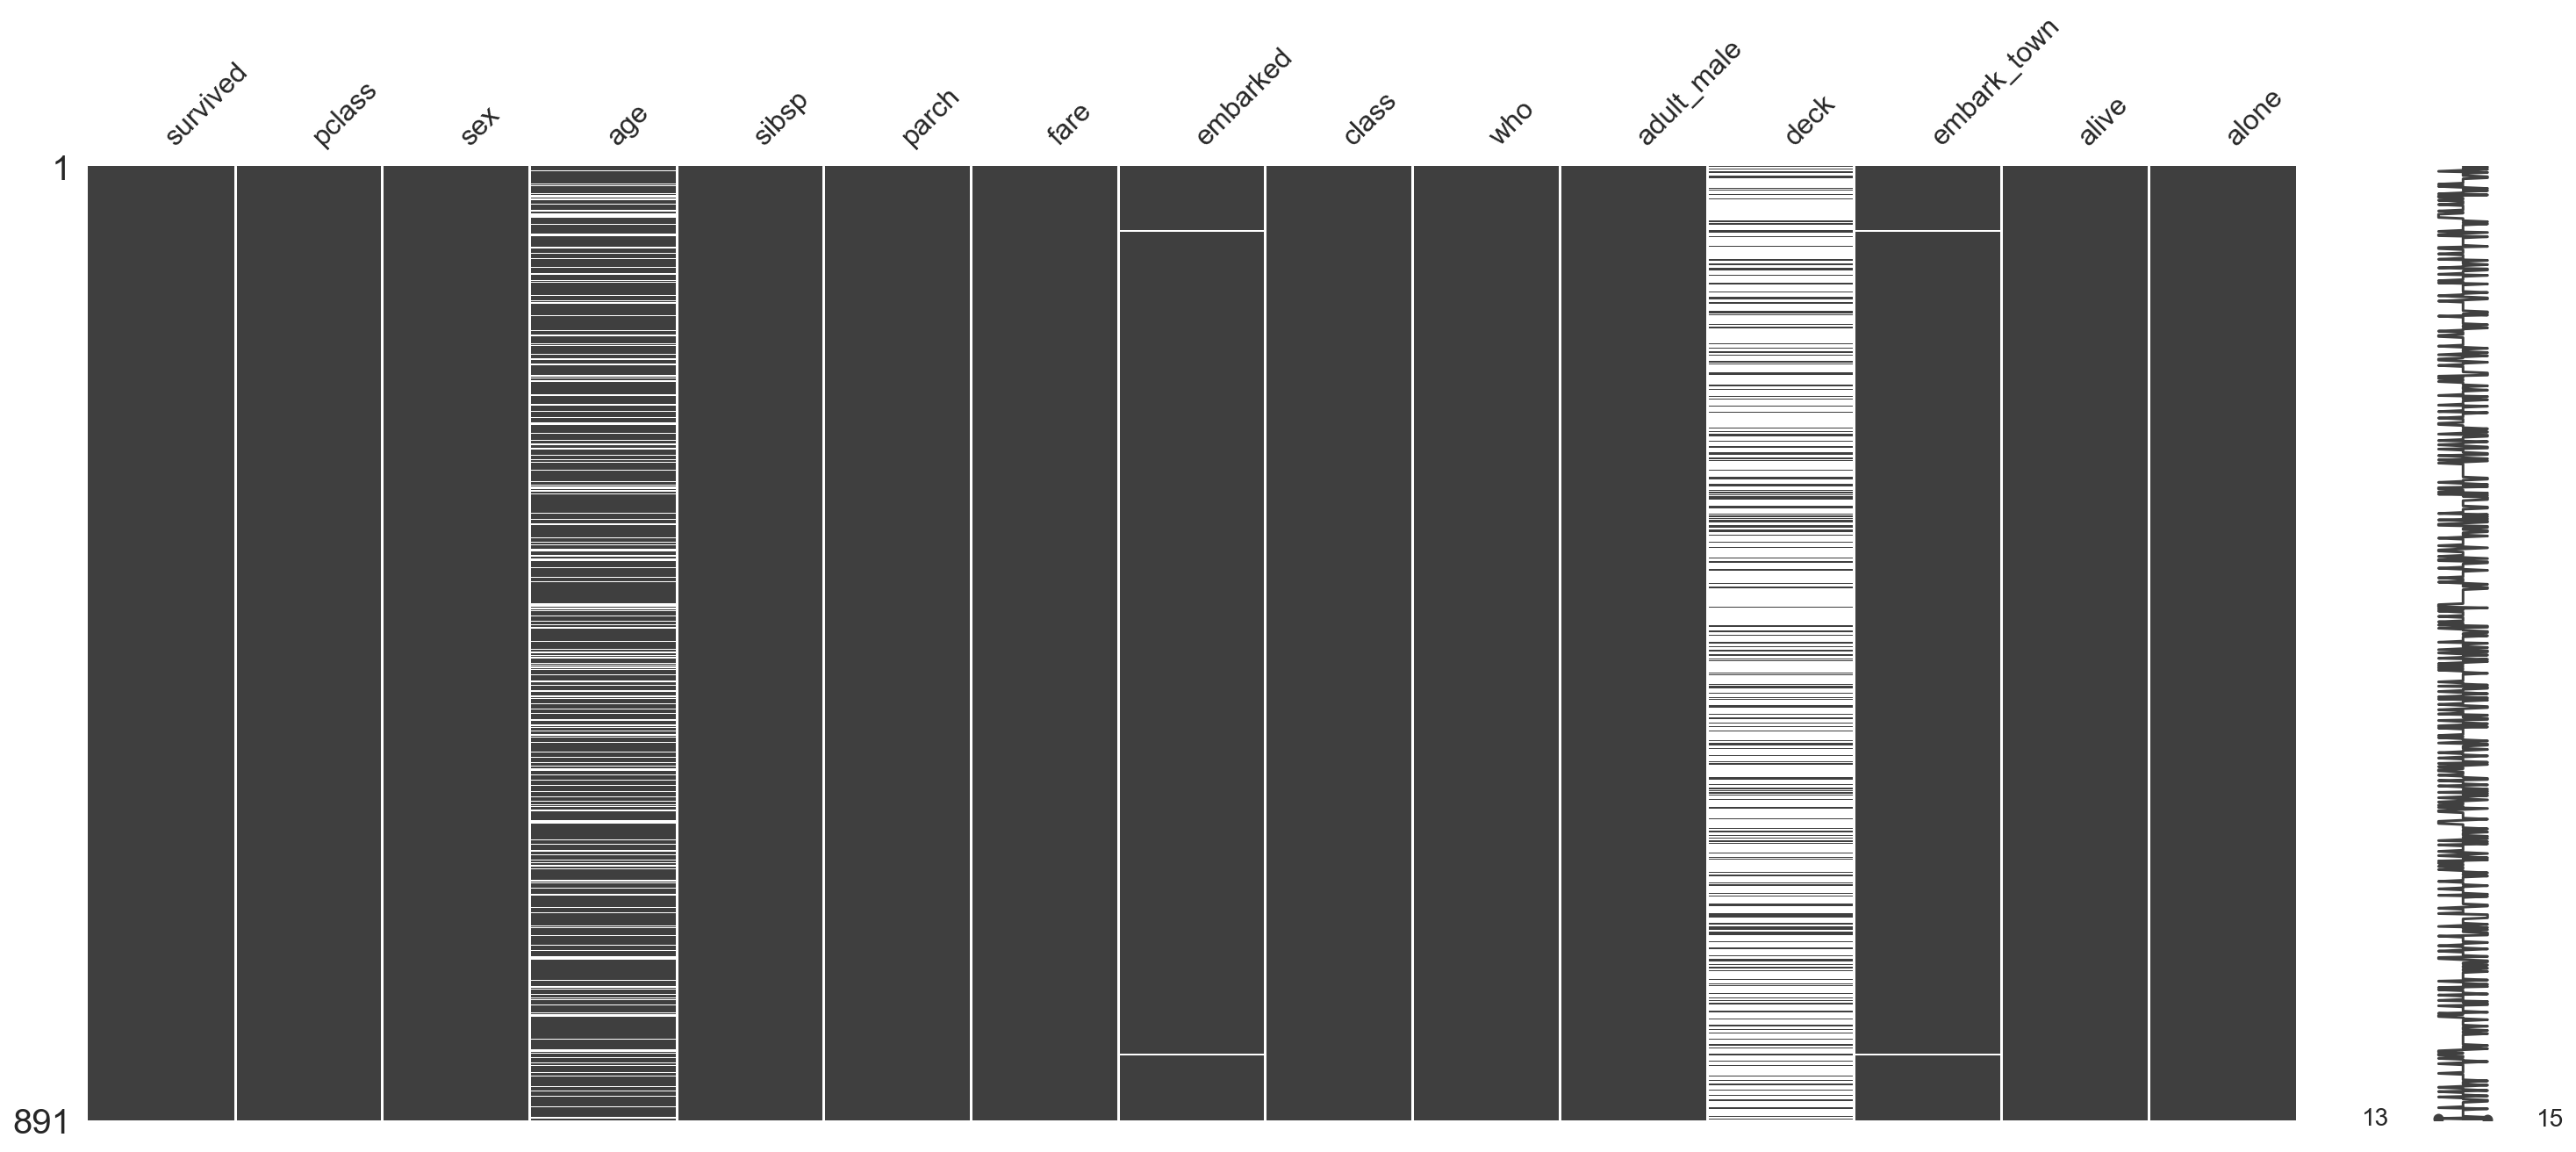

In [13]:
msno.matrix(titanic_df)

In [15]:
# 80% 이상 데이터가 있는 컬럼만 남기기

titanic_df=  titanic_df.dropna(thresh=int(len(titanic_df)*0.8), axis=1)

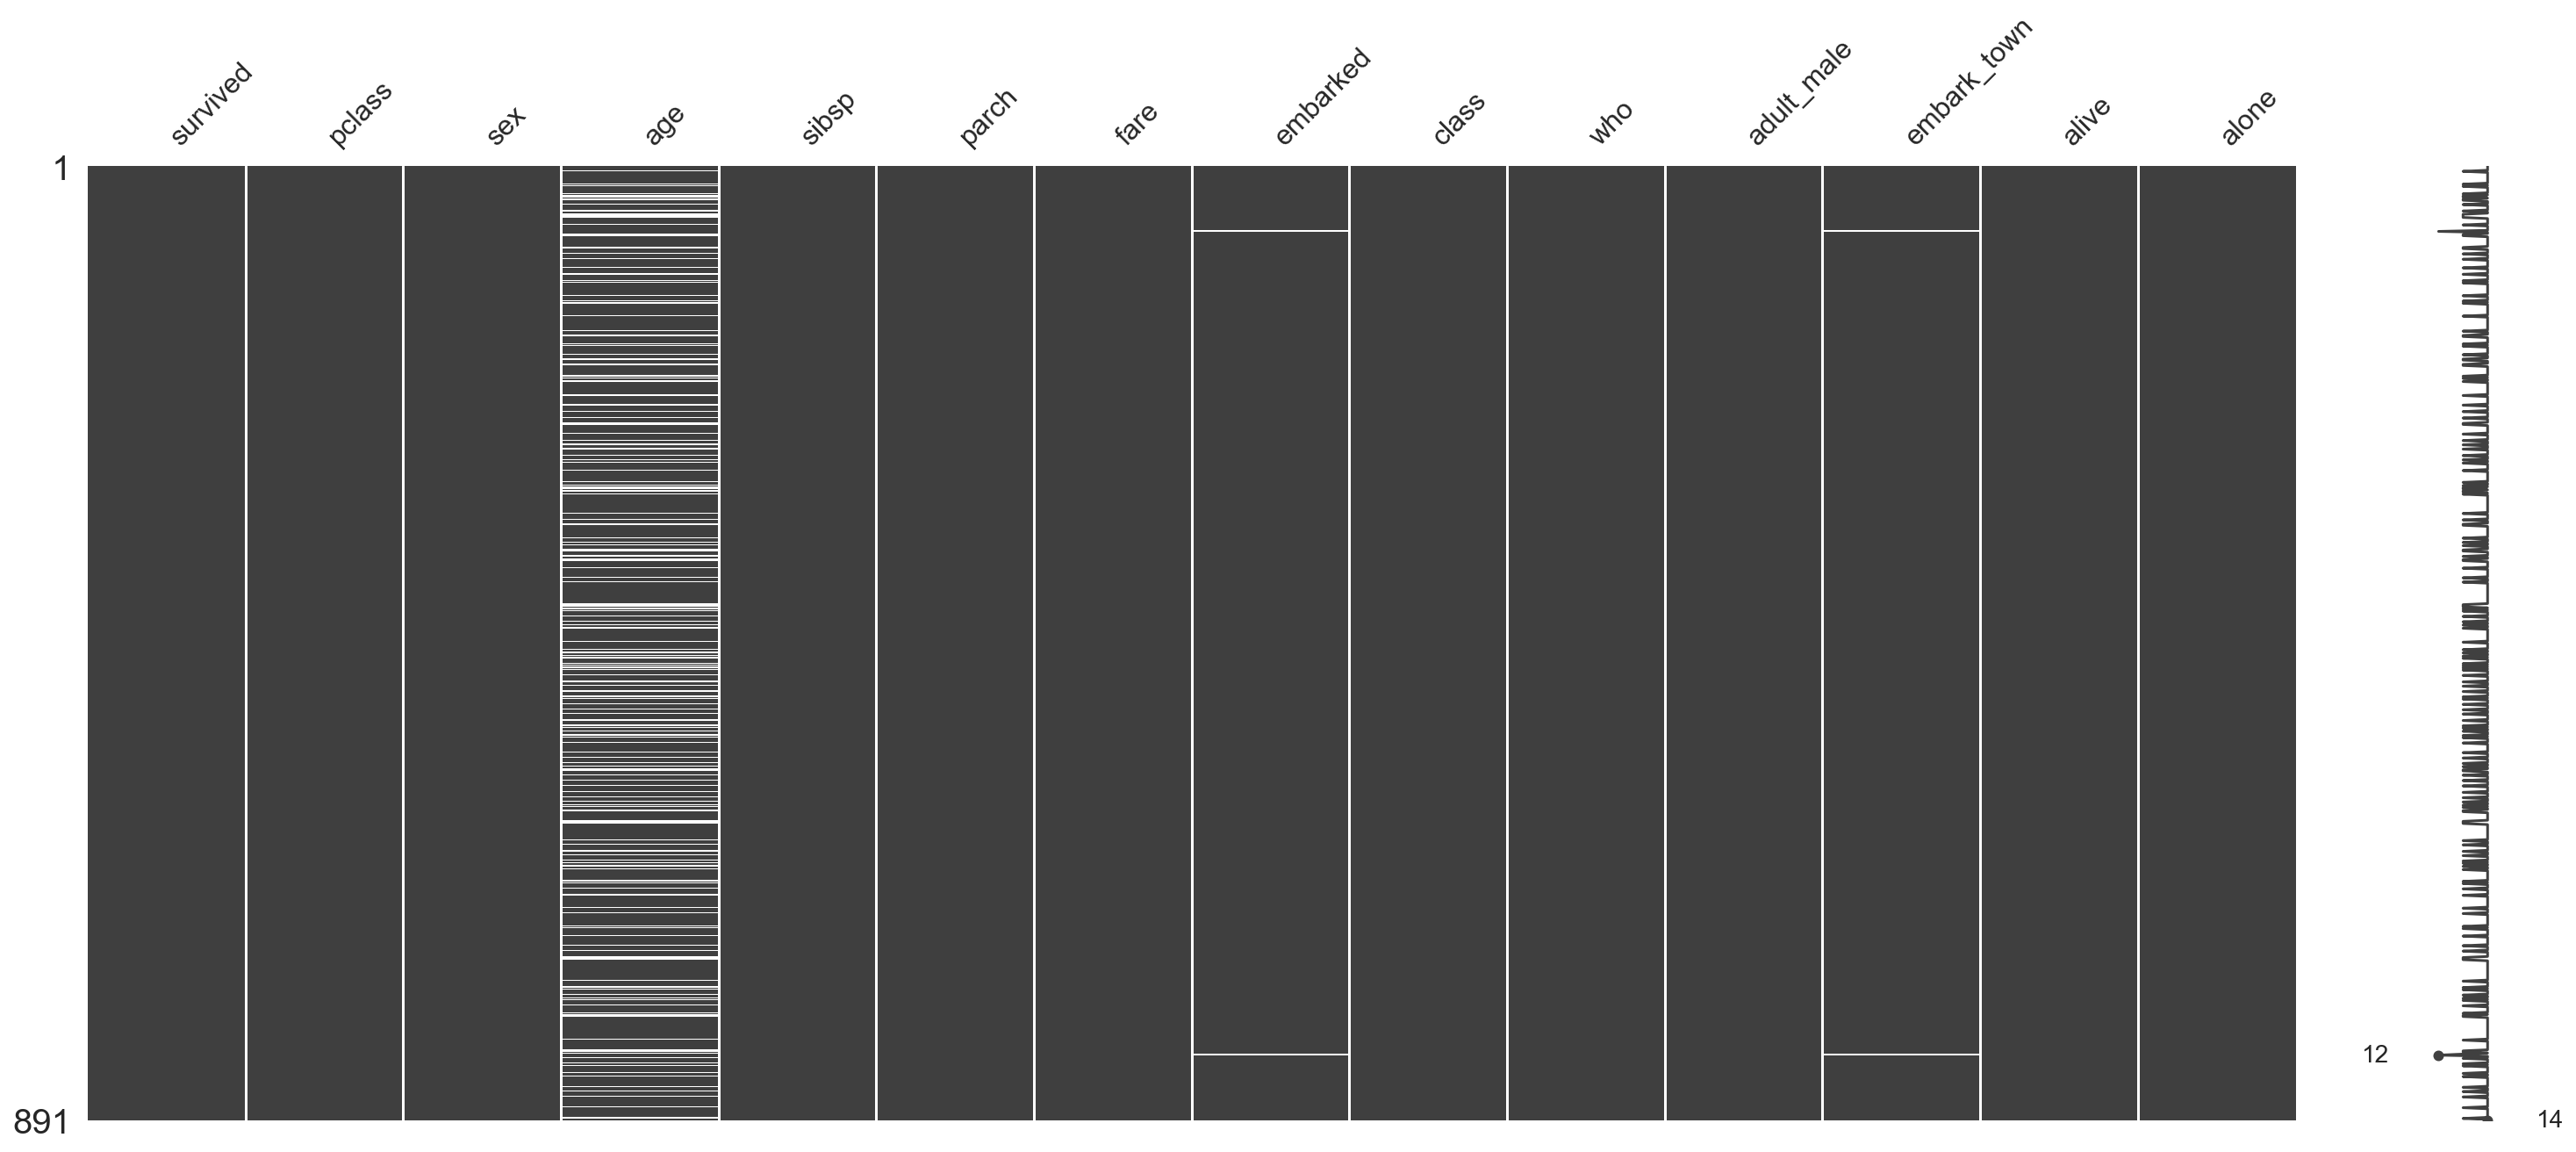

In [16]:
msno.matrix(titanic_df)

In [ ]:
titanic_df

### 2. 결측치 채우기
- 평균값, 중간값, 최빈값, -1,0,1

In [17]:
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,A
6,7.0,0.7,7.0,NaN,A


In [18]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(strategy="most_frequent")

In [21]:
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

### 타이타닉

In [22]:
titanic_df = sns.load_dataset("titanic")

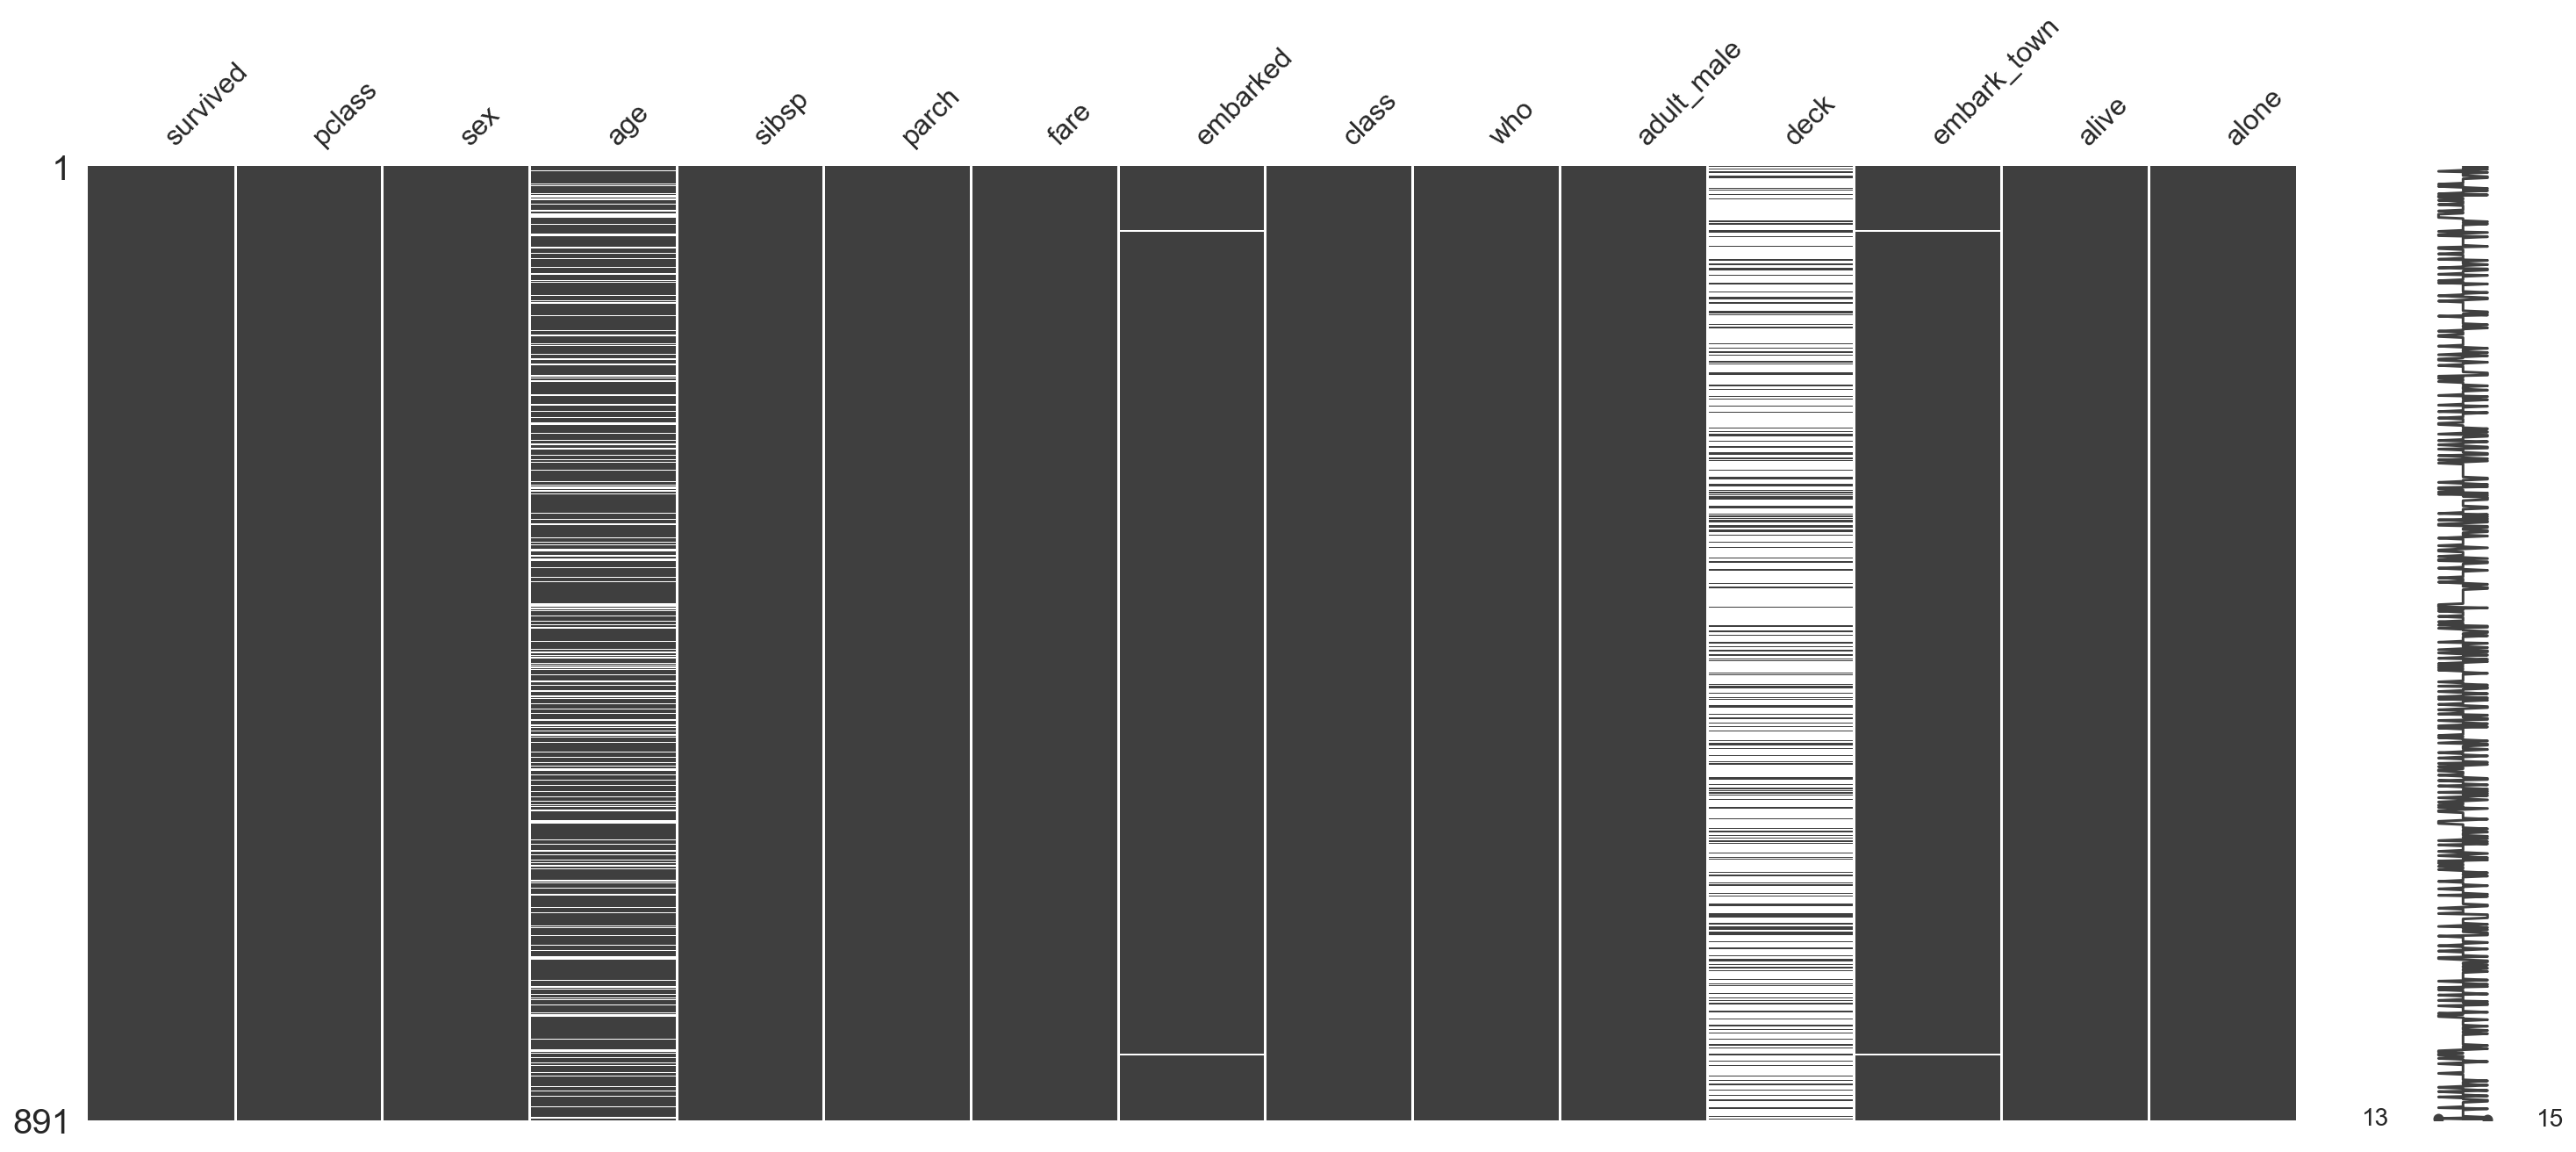

In [23]:
msno.matrix(titanic_df)

In [ ]:
# 80% 이상의 컬럼 데이터만 남기고 
# 범주현 데이터는 최빈값
# 수치형 데이터는 평균이나 중앙값으로 채우기

In [24]:
titanic_df=  titanic_df.dropna(thresh=int(len(titanic_df)*0.8), axis=1)

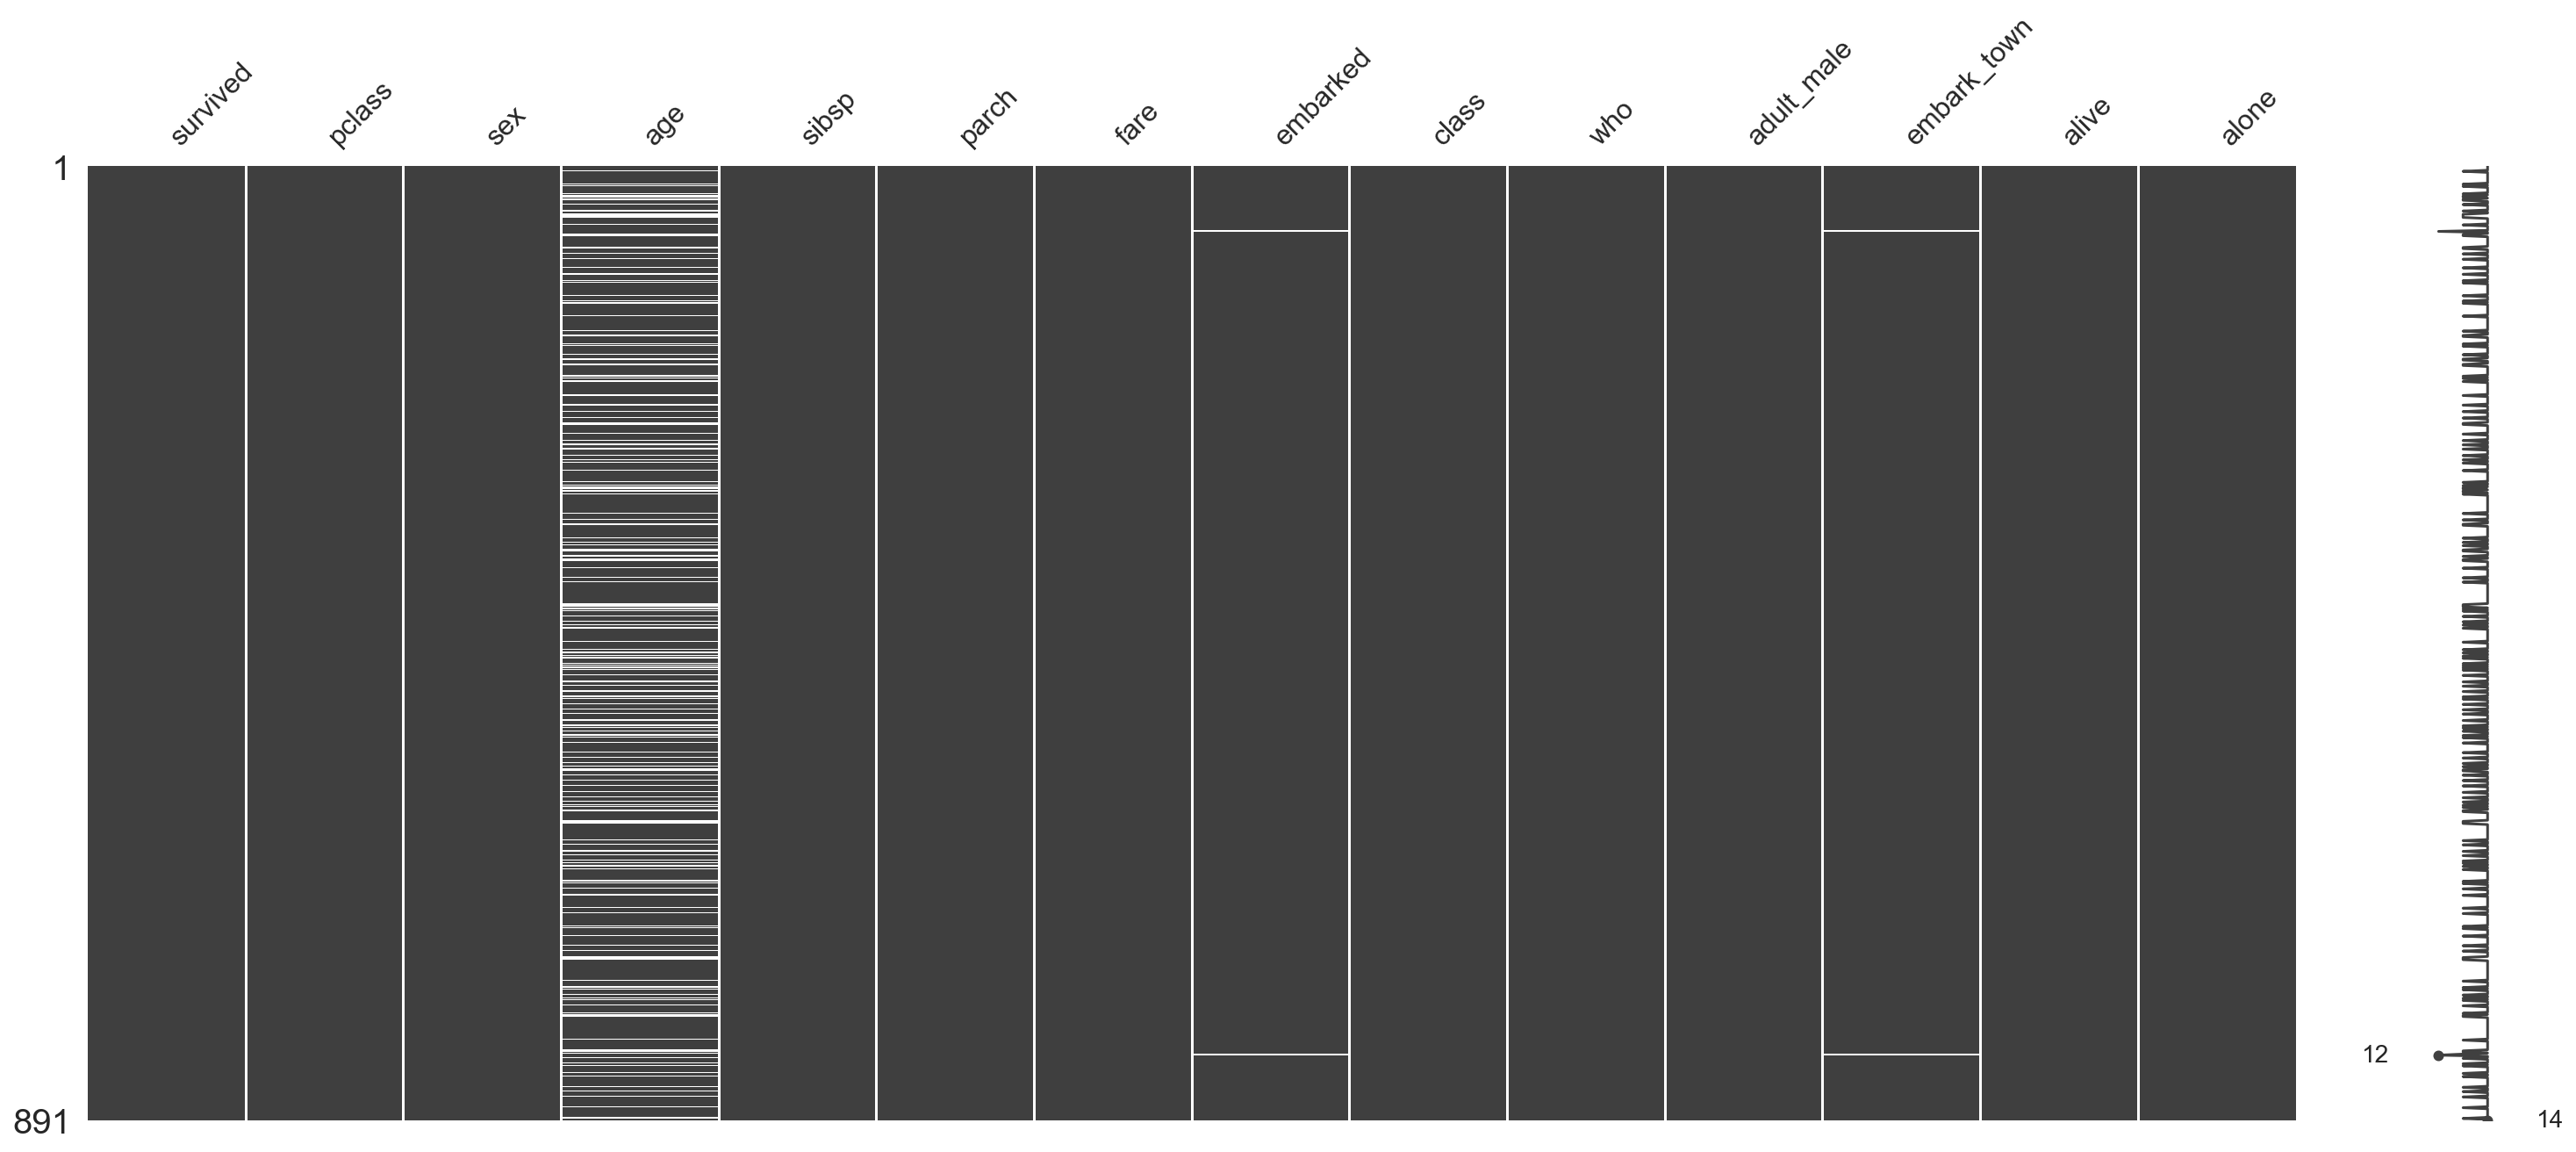

In [25]:
msno.matrix(titanic_df)

In [26]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [27]:
columns = ["embarked", "embark_town"]
imputer_mf = SimpleImputer(strategy="most_frequent")

In [ ]:
titanic_df

In [28]:
imputer_median = SimpleImputer(strategy="median")

In [29]:
titanic_df["age"] = imputer_median.fit_transform(titanic_df[["age"]])

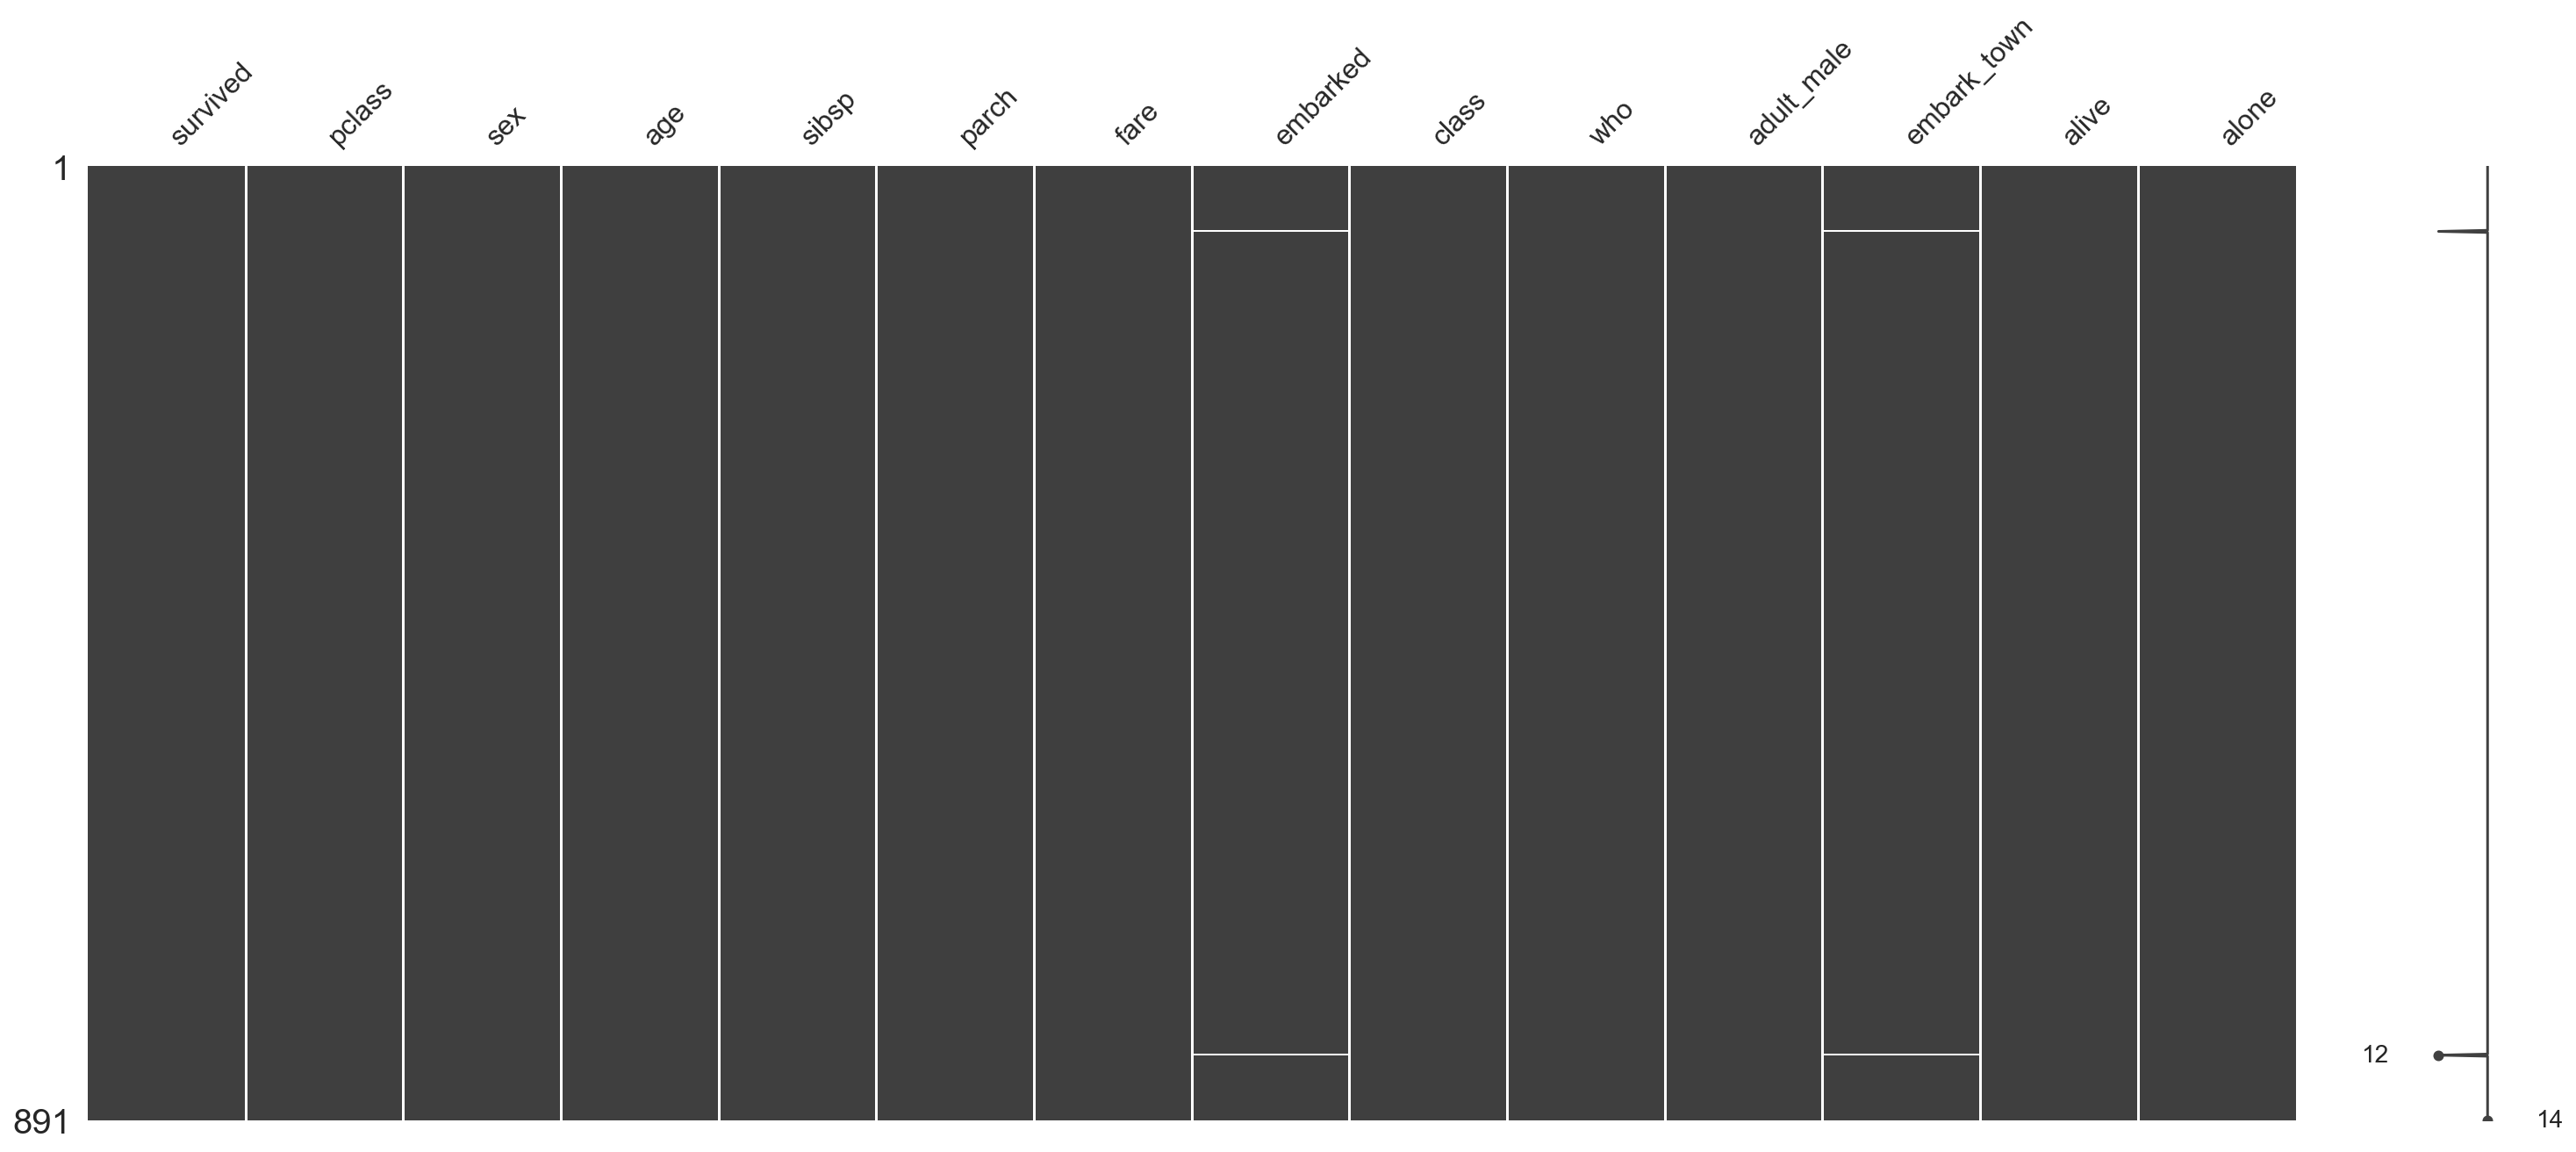

In [30]:
msno.matrix(titanic_df)

## 2. 범주형 데이터
- 더미 변수화 : 원핫 인코딩

In [31]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [33]:
df = titanic_df[['survived','pclass', 'sex', 'age','embarked']]
df

,survived,pclass,sex,age,embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,28.0,S
889,1,1,male,26.0,C


In [37]:
sex_df = pd.get_dummies(df["sex"])
embarked_df = pd.get_dummies(df["embarked"])
df = pd.concat([df,sex_df, embarked_df], axis=1)
df

,survived,pclass,sex,age,embarked,female,male,C,Q,S,female,male,C,Q,S
0,0,3,male,22.0,S,0,1,0,0,1,0,1,0,0,1
1,1,1,female,38.0,C,1,0,1,0,0,1,0,1,0,0
2,1,3,female,26.0,S,1,0,0,0,1,1,0,0,0,1
3,1,1,female,35.0,S,1,0,0,0,1,1,0,0,0,1
4,0,3,male,35.0,S,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,S,0,1,0,0,1,0,1,0,0,1
887,1,1,female,19.0,S,1,0,0,0,1,1,0,0,0,1
888,0,3,female,28.0,S,1,0,0,0,1,1,0,0,0,1
889,1,1,male,26.0,C,0,1,1,0,0,0,1,1,0,0


In [38]:
df.drop(columns=["sex","embarked"])

,survived,pclass,age,female,male,C,Q,S,female,male,C,Q,S
0,0,3,22.0,0,1,0,0,1,0,1,0,0,1
1,1,1,38.0,1,0,1,0,0,1,0,1,0,0
2,1,3,26.0,1,0,0,0,1,1,0,0,0,1
3,1,1,35.0,1,0,0,0,1,1,0,0,0,1
4,0,3,35.0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,1,0,0,1,0,1,0,0,1
887,1,1,19.0,1,0,0,0,1,1,0,0,0,1
888,0,3,28.0,1,0,0,0,1,1,0,0,0,1
889,1,1,26.0,0,1,1,0,0,0,1,1,0,0
